<a href="https://colab.research.google.com/github/mishraabhyuday/Text_Mercato_Task/blob/main/Text_Mercato_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications import VGG19, inception_v3, imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator

import numpy as np
import os

In [2]:
model = VGG19()

574717952/574710816 [==============================] - 4s 0us/step


In [3]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Prediction using above model**

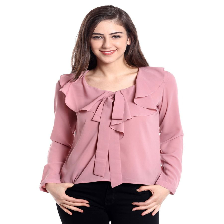

In [6]:
load_img('/content/pic_15.jpg', target_size=(224,224))

In [7]:
imagesize = (224,224)
image = load_img('/content/pic_15.jpg', target_size= imagesize)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)
pred = model.predict(image)
pred = imagenet_utils.decode_predictions(pred)
Class = pred[0][0][1]
Conf = pred[0][0][2]
print(Class, "With", Conf, "Confidence")

40960/35363 [==================================] - 0s 0us/step
trench_coat With 0.9237135 Confidence


***Building New Model***

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, BatchNormalization, Input

import pandas as pd
import cv2

In [9]:

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [10]:
cd /content/drive/MyDrive/Text_Mercato_Assgn/Assgn

/content/drive/MyDrive/Text_Mercato_Assgn/Assgn


In [11]:
pwd

'/content/drive/MyDrive/Text_Mercato_Assgn/Assgn'

In [12]:
df = pd.read_excel('dataset_1.xlsx')
df.head()

,Title,Description,Material,Pattern,Neckline,Image_Path
0,Peach Poly Crepe jumpsuit,This stylish foil print kurta from janasya is ...,Crepe,Printed,Round Neck,/images/pic_0.jpg
1,Light Brown Bias Yoke Checks Top,This check pattern top by Work Label is crafte...,Cotton,Checks,Round Neck,/images/pic_1.jpg
2,Off White Geometric Straight Cotton Dobby Top ...,"Featuring elegant printed details, this off wh...",Viscose,Checks,Round Neck,/images/pic_2.jpg
3,Blue Me Away Cape Top,Add an extra dose of style to your casual ward...,Polyester,Solid/Plain,V-Neck,/images/pic_3.jpg
4,Yellow On A High Gown,Yellow polyester georgette maxi dress. Polyest...,Polyester,Solid/Plain,V-Neck,/images/pic_4.jpg


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        500 non-null    object
 1   Description  500 non-null    object
 2   Material     500 non-null    object
 3   Pattern      500 non-null    object
 4   Neckline     500 non-null    object
 5   Image_Path   500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [14]:
print('Total Number of Unique value in Material Column:',df.Material.nunique())
print('Total Number of Unique value in Pattern Column:',df.Pattern.nunique())
print('Total Number of Unique value in Neckline Column:', df.Neckline.nunique())

Total Number of Unique value in Material Column: 30
Total Number of Unique value in Pattern Column: 18
Total Number of Unique value in Neckline Column: 22


In [15]:
#Unique values in materials
Materials = np.array(sorted(list(df.Material.unique())))
Materials

array(['Blended Fabric', 'Chiffon', 'Cotton', 'Crepe', 'Crinkled',
       'Denim', 'Georgette', 'Khadi', 'Knitted', 'Lace', 'Leather',
       'Linen', 'Lyocell', 'Modal', 'Net', 'Nylon', 'Organic', 'Organza',
       'Polyamide', 'Polycotton', 'Polyester', 'Poplin', 'Rayon', 'Satin',
       'Sequin', 'Silk', 'Suede', 'Velvet', 'Viscose', 'Wool'],
      dtype='<U14')

In [16]:
#unique values in pattern
Patterns = np.array(sorted(list(df.Pattern.unique())))
Patterns

array(['Animal Print', 'Checks', 'Detailing', 'Embellished/Sequined',
       'Embroidered', 'Floral', 'Geometric', 'Mirror Work', 'Ombre',
       'Patterned', 'Plaid', 'Pleated', 'Polka Dots', 'Printed',
       'Ruffled', 'Solid/Plain', 'Stripes', 'Tie & Dye'], dtype='<U20')

In [17]:
#unique values in neckline
Necklines = np.array(sorted(list(df.Neckline.unique())))
Necklines


array(['Boat Neck', 'Cold Shoulder', 'Collar Neck', 'Cowl Neck',
       'Crew Neck', 'Halter Neck', 'High Neck', 'Hooded', 'Keyhole Neck',
       'Mandarin Neck', 'Off Shoulder', 'One Shoulder', 'Plunging Neck',
       'Queen Anne', 'Round Neck', 'Ruffled Neck', 'Scoop Neck',
       'Shoulder Straps', 'Square Neck', 'Strapless/Tube', 'Sweetheart',
       'V-Neck'], dtype='<U15')

In [18]:
#Getting seperated variables
data = list(df['Image_Path'])
label_Material = df["Material"]
label_Pattern = df["Pattern"]
label_Neckline = df["Neckline"]

In [19]:
#Train dataset contains image arrays of all images
train = []
for imagePath in data:
  image = cv2.imread("."+imagePath)
  image = cv2.resize(image, (224,224))
  image = img_to_array(image)
  train.append(image)

In [20]:
Data = np.array(train)
label_Material = np.array(label_Material)

In [21]:
len(label_Material), len(Data)

(500, 500)

***Model training for material prediction***

In [22]:
## Convert the labels to the machine understandable form
lb = LabelEncoder()
Label_Material = lb.fit_transform(label_Material)
Label_Materials = to_categorical(Label_Material)

In [23]:
#getting train as well as validation set 
X_train, X_test, y_train, y_test = train_test_split(Data, Label_Materials, test_size=0.25 )

**Image Generator allows to randmly transform the set of images such that it can be rotated by any angle from 0 to 360 degrees.**

In [24]:
imageGen = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)

**Sequential Model**

In [25]:

model = Sequential()

In [26]:
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(50, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(500, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

##Outputlayer
model.add(Dense(30, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#training on 50 epochs
model.fit(imageGen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
12/12 [==============================] - 130s 11s/step - loss: 159.6027 - accuracy: 0.1759 - val_loss: 1259.4773 - val_accuracy: 0.1520
Epoch 2/50
12/12 [==============================] - 126s 11s/step - loss: 245.9198 - accuracy: 0.2116 - val_loss: 1656.8583 - val_accuracy: 0.1040
Epoch 3/50
12/12 [==============================] - 126s 11s/step - loss: 218.8645 - accuracy: 0.2146 - val_loss: 925.6569 - val_accuracy: 0.2320
Epoch 4/50
12/12 [==============================] - 126s 10s/step - loss: 171.6804 - accuracy: 0.2521 - val_loss: 706.1562 - val_accuracy: 0.1440
Epoch 5/50
12/12 [==============================] - 126s 10s/step - loss: 145.2501 - accuracy: 0.2673 - val_loss: 448.7904 - val_accuracy: 0.2240
Epoch 6/50
12/12 [==============================] - 125s 10s/step - loss: 120.1257 - accuracy: 0.2065 - val_loss: 469.3510 - val_accuracy: 0.0800
Epoch 7/50
12/12 [==============================] - 125s 10s/step - loss: 75.6932 - accuracy: 0.2214 - val_loss: 274.5308 

***Using Transfer Learning and remodelling to VGG19 Model***

In [ ]:
## Convert the images into the array
Train = []
for imagePath in data:
  image = load_img("."+ imagePath, target_size=(224,224))
  image = img_to_array(image)
  image = preprocess_input(image)
  Train.append(image)

In [ ]:
Image_data = np.array(Train)

In [ ]:

generator = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Image_data, Label_Materials, test_size=0.25 )

In [ ]:
### build model using transfer learning with VGG19 dataset

basemodel = VGG19(weights='imagenet', include_top=False, input_tensor=(Input(shape=(224,224,3))))

In [ ]:
basemodel.summary()

In [ ]:
## Functional API
headmodel = basemodel.output    ## it will returns the last layer of our basemodel
headmodel = Flatten()(headmodel)
headmodel = Dense(1024, activation='relu')(headmodel) 
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(30, activation='softmax')(headmodel)

In [ ]:
material_model = Model(inputs= basemodel.input, outputs= headmodel)

In [ ]:

## We don't want to train our pretrained basemodel VGG19 
for layers in basemodel.layers:  
  layers.trainable = False

In [ ]:
material_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PMaterial = material_model.fit_generator(generator.flow(Image_data, Label_Materials, batch_size=32), epochs=100)

In [ ]:
##Lets predict
image = load_img('./images/pic_2.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = material_model.predict(image)
pred

In [ ]:
## Predicted class
pred_mat = np.argmax(pred)
ypred = Materials[pred_mat]

## Actual Class
actual = df[df['Image_Path'] == '/images/pic_2.jpg']
yactual = actual.Material.values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

In [ ]:
##Lets predict for another image
image = load_img('./images/pic_49.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = material_model.predict(image)
pred


In [ ]:

## Predicted class
pred_mat = np.argmax(pred)
ypred = Materials[pred_mat]

## Actual Class
actual = df[df['Image_Path'] == '/images/pic_49.jpg']
yactual = actual.Material.values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

In [ ]:
## Save the material model
material_model.save('Material_model.h5')

In [ ]:

## Convert the labels to the machine understandable form
lb = LabelEncoder()
Label_Pattern = lb.fit_transform(label_Pattern)
Label_Patterns = to_categorical(Label_Pattern)

In [ ]:

len(Label_Patterns[0])

In [ ]:
#generator function
generator = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)


In [ ]:
### build model using transfer learning with VGG19 dataset

basemodel = VGG19(weights='imagenet', include_top=False, input_tensor=(Input(shape=(224,224,3))))

In [ ]:
headmodel = basemodel.output    ## it will returns the last layer of our basemodel
headmodel = Flatten()(headmodel)
headmodel = Dense(1024, activation='relu')(headmodel) 
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(18, activation='softmax')(headmodel)

## Combine basemodel and headmodel in a single model
pattern_model = Model(inputs= basemodel.input, outputs= headmodel)

In [ ]:
## We don't want to train our pretrained basemodel VGG19 
for layers in basemodel.layers:  
  layers.trainable = False

In [ ]:
pattern_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PPatterns = pattern_model.fit_generator(generator.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=100)

In [ ]:
pattern_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PPattern = pattern_model.fit_generator(generator.flow(Image_data, Label_Patterns, batch_size=32), epochs=100)

In [ ]:
## Check the prediction

image = load_img('./images/pic_99.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = pattern_model.predict(image)
pred

In [ ]:
## Predicted class
pred_pat = np.argmax(pred)
ypred = Patterns[pred_pat]

## Actual class
actual = df[df['Image_Path'] == '/images/pic_99.jpg']
yactual = actual['Pattern'].values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

In [ ]:
## Check the prediction

image = load_img('./images/pic_39.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = pattern_model.predict(image)
pred

In [ ]:
## Predicted class
pred_pat = np.argmax(pred)
ypred = Patterns[pred_pat]

## Actual class
actual = df[df['Image_Path'] == '/images/pic_39.jpg']
yactual = actual['Pattern'].values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

In [ ]:
## Save the model
pattern_model.save('Pattern_model.h5')

In [ ]:

## Convert the labels to the machine understandable form
lb = LabelEncoder()
Label_Neckline = lb.fit_transform(label_Neckline)
Label_Necklines = to_categorical(Label_Neckline)

In [ ]:
len(Label_Necklines[0])

In [ ]:
generator = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)

In [ ]:
### build model using transfer learning with VGG19 dataset

basemodel = VGG19(weights='imagenet', include_top=False, input_tensor=(Input(shape=(224,224,3))))

In [ ]:
headmodel = basemodel.output    ## it will returns the last layer of our basemodel
headmodel = Flatten()(headmodel)
headmodel = Dense(1024, activation='relu')(headmodel) 
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(22, activation='softmax')(headmodel)

## Combine basemodel and headmodel in a single model
neckline_model = Model(inputs= basemodel.input, outputs= headmodel)

In [ ]:
## We don't want to train our pretrained basemodel VGG19 
for layers in basemodel.layers:  
  layers.trainable = False

In [ ]:
neckline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PNeckline = neckline_model.fit_generator(generator.flow(Image_data, Label_Necklines, batch_size=32), epochs=100)

In [ ]:
## Check the prediction

image = load_img('./images/pic_95.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = neckline_model.predict(image)
pred

In [ ]:
## Predicted class
pred_pat = np.argmax(pred)
ypred = Necklines[pred_pat]

## Actual class
actual = df[df['Image_Path'] == '/images/pic_95.jpg']
yactual = actual['Neckline'].values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

In [ ]:
## Check the prediction for one more image

image = load_img('./images/pic_34.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = neckline_model.predict(image)
pred

In [ ]:
## Predicted class
pred_pat = np.argmax(pred)
ypred = Necklines[pred_pat]

## Actual class
actual = df[df['Image_Path'] == '/images/pic_34.jpg']
yactual = actual['Neckline'].values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

In [ ]:

## Save the model
neckline_model.save('Neckline_model.h5')

In [ ]:
image = load_img('test_img.jpg', target_size=(224,224))
image

In [ ]:
## convert the image in machine readable format
image = load_img('test_img.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [ ]:
## lets make some prediction on images
pred_mat = material_model.predict(image)
pred_pat = pattern_model.predict(image)
pred_nec = neckline_model.predict(image)


## Predicted class for material
pred_Mat = np.argmax(pred_mat)
pred_Mat = Materials[pred_Mat]
## predicted class for Pattern
pred_Pat = np.argmax(pred_pat)
pred_Pat = Patterns[pred_Pat]
## Predicted class for Neckline
pred_Nec = np.argmax(pred_nec)
pred_Nec = Necklines[pred_Nec]

In [ ]:
print(f"Therefore, the Material, Pattern and Necline for the above downloaded image is: {pred_Mat} {pred_Pat} {pred_Nec}")

In [ ]:

image = load_img('test_img2.jpg', target_size=(224,224))
image

In [ ]:

## convert the image in machine readable format
image = load_img('test_img2.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [ ]:
## lets make some prediction on images
pred_mat = material_model.predict(image)
pred_pat = pattern_model.predict(image)
pred_nec = neckline_model.predict(image)


## Predicted class for material
pred_Mat = np.argmax(pred_mat)
pred_Mat = Materials[pred_Mat]
## predicted class for Pattern
pred_Pat = np.argmax(pred_pat)
pred_Pat = Patterns[pred_Pat]
## Predicted class for Neckline
pred_Nec = np.argmax(pred_nec)
pred_Nec = Necklines[pred_Nec]

In [ ]:

print(f"Therefore, the Material, Pattern and Necline for the above downloaded image is: {pred_Mat} {pred_Pat} {pred_Nec}")